In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_excel('C:/Users/Akshay-Laptop/Desktop/practice/Restaurant_food_cost/Participants_Data_Final/Data_Train.xlsx')
data.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [3]:
data_test=pd.read_excel('C:/Users/Akshay-Laptop/Desktop/practice/Restaurant_food_cost/Participants_Data_Final/Data_Test.xlsx')
data_test.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


In [4]:
data.shape

(12690, 9)

In [5]:
data.dtypes

TITLE            object
RESTAURANT_ID     int64
CUISINES         object
TIME             object
CITY             object
LOCALITY         object
RATING           object
VOTES            object
COST              int64
dtype: object

In [6]:
data.RESTAURANT_ID.value_counts()

7264     8
4634     7
9910     6
13173    5
1571     5
12747    5
8171     5
3378     5
13150    5
2231     5
1521     5
11971    5
7745     5
8032     5
10614    5
12891    5
4058     5
661      4
7173     4
13078    4
12129    4
10648    4
13513    4
5804     4
5227     4
8351     4
201      4
6935     4
12645    4
10357    4
        ..
2484     1
12723    1
14770    1
4527     1
6574     1
429      1
2476     1
14786    1
453      1
6598     1
8665     1
12771    1
14818    1
8673     1
10720    1
477      1
2524     1
12763    1
14810    1
10712    1
4551     1
4567     1
469      1
14802    1
4559     1
461      1
2508     1
14794    1
10696    1
0        1
Name: RESTAURANT_ID, Length: 11892, dtype: int64

In [7]:
data.drop('RESTAURANT_ID',axis=1,inplace=True)

In [8]:
data.TITLE.value_counts()

QUICK BITES                     4218
CASUAL DINING                   3652
None                            1003
CAFÉ                             607
DESSERT PARLOR                   382
CASUAL DINING,BAR                349
FINE DINING                      308
BAKERY                           302
BEVERAGE SHOP                    156
BAR,CASUAL DINING                128
LOUNGE                            98
BAKERY,QUICK BITES                92
BAR                               91
FOOD COURT                        78
CASUAL DINING,CAFÉ                56
MESS                              53
KIOSK                             53
BAKERY,DESSERT PARLOR             51
PUB                               50
DESSERT PARLOR,QUICK BITES        48
SWEET SHOP,QUICK BITES            48
DHABA                             45
SWEET SHOP                        44
CAFÉ,CASUAL DINING                35
QUICK BITES,SWEET SHOP            35
BEVERAGE SHOP,QUICK BITES         33
FINE DINING,BAR                   32
C

In [9]:
data.CUISINES.value_counts()

South Indian                                                          532
North Indian                                                          526
North Indian, Chinese                                                 501
Fast Food                                                             286
Chinese                                                               167
Bakery                                                                148
Bakery, Desserts                                                      148
South Indian, North Indian, Chinese                                   139
Cafe                                                                  134
Kerala                                                                131
Biryani                                                               129
Street Food                                                           121
Chinese, North Indian                                                 119
South Indian, North Indian            

In [10]:
data.head(50)

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR","Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
5,CASUAL DINING,"North Indian, Chinese, Seafood, Biryani",12noon – 12:30AM (Mon-Sun),Mumbai,Vile Parle West,4.0,550 votes,800
6,CAFÉ,"Cafe, Chinese, Pizza, North Indian, Burger","12noon – 11:30pm (Mon, Tue, Thu, Fri, Sat, Sun...",Bangalore,Koramangala 6th Block,4.1,509 votes,600
7,MICROBREWERY,Bar Food,1pm – 1am (Mon-Sun),Gurgaon,Sector 29,4.3,1612 votes,1600
8,QUICK BITES,"South Indian, North Indian",7am – 10:30pm (Mon-Sun),Bangalore,Bannerghatta Road,3.9,101 votes,300
9,QUICK BITES,North Indian,"11am – 2pm, 4pm – 10:30pm (Mon-Sun)",Hyderabad,Dilsukhnagar,3.3,219 votes,200


In [11]:
data.fillna('missing',inplace=True)

In [12]:
data.isnull().sum()

TITLE       0
CUISINES    0
TIME        0
CITY        0
LOCALITY    0
RATING      0
VOTES       0
COST        0
dtype: int64

In [13]:
data.drop('TIME',axis=1,inplace=True)

In [14]:
data.RATING.value_counts()

3.9        1238
3.8        1190
4.0        1099
3.7        1086
3.6         951
4.1         936
3.5         771
4.2         723
NEW         707
3.4         575
4.3         556
-           495
3.3         365
4.4         362
3.2         266
4.5         199
2.9         186
3.1         186
3.0         170
2.8         146
4.6         141
2.7          89
4.7          69
2.6          61
2.5          35
4.8          32
4.9          22
2.4          15
2.3          10
2.1           3
missing       2
2.0           2
2.2           2
Name: RATING, dtype: int64

In [15]:
data.RATING.replace('missing','3.9',inplace=True)

In [16]:
data.RATING.replace('NEW','2.5',inplace=True)

In [17]:
data.RATING.replace('-','2.5',inplace=True)

In [18]:
data.RATING=data.RATING.astype('float64')

In [19]:
data.CITY.value_counts()

Chennai                                                           2174
Bangalore                                                         2149
Hyderabad                                                         1819
Mumbai                                                            1722
New Delhi                                                         1321
Kochi                                                             1279
Gurgaon                                                            379
Secunderabad                                                       310
Noida                                                              211
Navi Mumbai                                                        165
missing                                                            112
Ghaziabad                                                          102
Thane                                                               97
Faridabad                                                           79
Bandra

In [20]:
import re
def split(string):
    string=re.sub(r'[^0-9]','',string)
    string=re.sub(r'\s+',' ',string)
    return string

In [21]:
data['Votes']=data['VOTES'].apply(split)

In [22]:
data.Votes.replace('',0,inplace=True)

In [23]:
data.Votes=data.Votes.astype('int64')

In [24]:
data.head()

,TITLE,CUISINES,CITY,LOCALITY,RATING,VOTES,COST,Votes
0,CASUAL DINING,"Malwani, Goan, North Indian",Thane,Dombivali East,3.6,49 votes,1200,49
1,"CASUAL DINING,BAR","Asian, Modern Indian, Japanese",Chennai,Ramapuram,4.2,30 votes,1500,30
2,CASUAL DINING,"North Indian, Chinese, Biryani, Hyderabadi",Chennai,Saligramam,3.8,221 votes,800,221
3,QUICK BITES,"Tibetan, Chinese",Mumbai,Bandra West,4.1,24 votes,800,24
4,DESSERT PARLOR,Desserts,Mumbai,Lower Parel,3.8,165 votes,300,165


In [25]:
data_new=data.drop('VOTES',axis=1)

In [26]:
data_test.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


In [27]:
data_test.fillna('missing',inplace=True)

In [28]:
data_test.drop('TIME',axis=1,inplace=True)

In [29]:
data_test.isnull().sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
dtype: int64

In [30]:
data_test.RATING.replace('missing','3.9',inplace=True)

In [31]:
data_test.RATING.replace('NEW','2.5',inplace=True)

In [32]:
data_test.RATING.replace('-','2.5',inplace=True)

In [33]:
data_test.RATING=data_test.RATING.astype('float64')

In [34]:
import re
def split(string):
    string=re.sub(r'[^0-9]','',string)
    string=re.sub(r'\s+',' ',string)
    return string

In [35]:
data_test['Votes']=data_test['VOTES'].apply(split)

In [36]:
data_test.Votes.replace('',0,inplace=True)

In [37]:
data_test.Votes=data_test.Votes.astype('int64')

In [38]:
data_test.head()

,TITLE,RESTAURANT_ID,CUISINES,CITY,LOCALITY,RATING,VOTES,Votes
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",Noida,Sector 18,4.3,564 votes,564
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",Mumbai,Grant Road,4.2,61 votes,61
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",Mumbai,Marine Lines,3.8,350 votes,350
3,None,204,Biryani,Faridabad,NIT,3.8,1445 votes,1445
4,QUICK BITES,13453,"South Indian, Kerala",Kochi,Kaloor,3.6,23 votes,23


In [39]:
data_test_new=data_test.drop('VOTES',axis=1)

In [40]:
data_test_new=data_test_new.drop('RESTAURANT_ID',axis=1)

In [41]:
data_new1=pd.get_dummies(data_new,drop_first=True)

In [42]:
data_new1.head()

,RATING,COST,Votes,"TITLE_BAKERY,BEVERAGE SHOP","TITLE_BAKERY,CAFÉ","TITLE_BAKERY,CONFECTIONERY","TITLE_BAKERY,DESSERT PARLOR","TITLE_BAKERY,FOOD COURT","TITLE_BAKERY,QUICK BITES","TITLE_BAKERY,SWEET SHOP",...,LOCALITY_near Andhra Prabha office,LOCALITY_near swarn nagri,LOCALITY_nizampet,LOCALITY_nungambakkam,LOCALITY_perungudi,LOCALITY_rajendra nagar,LOCALITY_seawoods grand central mall,LOCALITY_sector 42,LOCALITY_shop 7 shikrupa socity,LOCALITY_shop no. 3 Sector 22
0,3.6,1200,49,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4.2,1500,30,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.8,800,221,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.1,800,24,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3.8,300,165,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
data_test_new.head()

,TITLE,CUISINES,CITY,LOCALITY,RATING,Votes
0,CASUAL DINING,"North Indian, Chinese, Mughlai, Kebab",Noida,Sector 18,4.3,564
1,QUICK BITES,"South Indian, Fast Food, Pizza, North Indian",Mumbai,Grant Road,4.2,61
2,CASUAL DINING,"North Indian, Seafood, Biryani, Chinese",Mumbai,Marine Lines,3.8,350
3,None,Biryani,Faridabad,NIT,3.8,1445
4,QUICK BITES,"South Indian, Kerala",Kochi,Kaloor,3.6,23


In [44]:
test_data=pd.get_dummies(data_test_new,drop_first=True)

In [45]:
test_data.head()

,RATING,Votes,"TITLE_BAKERY,BEVERAGE SHOP","TITLE_BAKERY,CAFÉ","TITLE_BAKERY,CASUAL DINING","TITLE_BAKERY,DESSERT PARLOR","TITLE_BAKERY,QUICK BITES",TITLE_BAR,"TITLE_BAR,CASUAL DINING","TITLE_BAR,LOUNGE",...,LOCALITY_Yeshwantpur,LOCALITY_Yousufguda,LOCALITY_Zakir Nagar,LOCALITY_international Airport,LOCALITY_kadubeesanahalli,LOCALITY_kakkanad,LOCALITY_lane besides to King’s Burger. Next to nellore mess,LOCALITY_missing,LOCALITY_phase 3,LOCALITY_sholinganallur
0,4.3,564,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4.2,61,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.8,350,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.8,1445,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3.6,23,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
data_in=data_new1.drop('COST',axis=1)
data_op=data_new1.COST

In [47]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import KFold

In [48]:
from sklearn.model_selection import cross_val_score as cvs
from sklearn.model_selection import train_test_split as tts

In [50]:
x_train,x_test,y_train,y_test=tts(data_in,data_op,random_state=42,test_size=0.20)

In [51]:
from sklearn.ensemble import RandomForestRegressor as RFR
RFR=RFR(random_state=40)
RFR.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=40, verbose=0,
                      warm_start=False)

In [52]:
from sklearn.ensemble import RandomForestRegressor as RFR
RFR=RFR(random_state=60,max_depth=9)
RFR.fit(x_train,y_train)
y_pred=RFR.predict(x_test)
train_pred=RFR.predict(x_train)
rscore=r2_score(y_test,y_pred)
rscore1=r2_score(y_train,train_pred)
kf = KFold(shuffle=True, n_splits=10)
cv=cvs(RFR,data_in,data_op,cv=kf,scoring='r2')
print('rscore for testing data:',rscore)
print('rscore for training data:',rscore1)
print('Cross val score:',cv)
print('Mean cv:',np.mean(cv))


rscore for testing data: 0.671656028272615
rscore for training data: 0.7335378386068416
Cross val score: [0.67520489 0.66305176 0.70683124 0.5807702  0.61929766 0.52113506
 0.68967143 0.64756263 0.64354601 0.69072487]
Mean cv: 0.6437795756058033


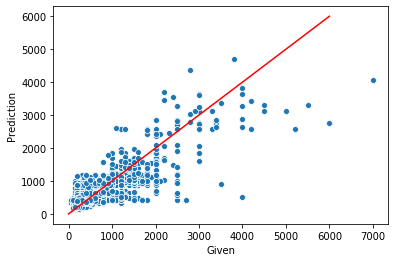

In [54]:
plot_k = sns.scatterplot(y_test, y_pred)
plot_k.set(xlabel='Given', ylabel='Prediction')
x_plot = np.linspace(0,6000,10)
y_plot = x_plot
plt.plot(x_plot, y_plot, color='r')from sklearn.metrics import mean_absolute_error,mean_squared_error


In [55]:
print('error:')
print('Mean absolute error of test data:',mean_absolute_error(y_test,y_pred))
print('Mean absolute error of train data:',mean_absolute_error(y_train,train_pred))
print('Mean squared error of test data:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('Mean squared error of train data:',np.sqrt(mean_squared_error(y_train,train_pred)))

error:
Mean absolute error of test data: 217.0306702235883
Mean absolute error of train data: 213.39244946685204
Mean squared error of test data: 343.7600231525828
Mean squared error of train data: 327.0167985582603


In [58]:
fees=pd.DataFrame({'Actual Cost':y_test,'Predicted Cost':y_pred})
fees

,Actual Cost,Predicted Cost
9197,550,364.924189
8310,500,406.497326
4602,500,988.467609
8748,950,997.854330
4464,150,213.589401
8862,150,586.516916
6011,1600,1132.685198
12496,500,656.733816
3800,350,436.493495
4156,350,399.540530


In [56]:
from sklearn.neighbors import KNeighborsRegressor
KNR=KNeighborsRegressor(n_neighbors=5,leaf_size=30)
KNR.fit(x_train,y_train)
y_pred=KNR.predict(x_test)
train_pred=KNR.predict(x_train)
rscore=r2_score(y_test,y_pred)
rscore1=r2_score(y_train,train_pred)
kf = KFold(shuffle=True, n_splits=10)
cv=cvs(KNR,data_in,data_op,cv=kf,scoring='r2')
print('rscore for testing data:',rscore)
print('rscore for training data:',rscore1)
print('Cross val score:',cv)
print('Mean cv:',np.mean(cv))

rscore for testing data: 0.13449055548756494
rscore for training data: 0.4514654166800197
Cross val score: [0.13117514 0.19564834 0.19994174 0.11216116 0.23362446 0.15781621
 0.13239036 0.0899044  0.1600954  0.09956924]
Mean cv: 0.1512326454429032


In [52]:
from sklearn.tree import DecisionTreeRegressor as DTC
DTC=DTC()
DTC.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [53]:
DTC.fit(x_train,y_train)
y_pred=DTC.predict(x_test)
train_pred=DTC.predict(x_train)
rscore=r2_score(y_test,y_pred)
rscore1=r2_score(y_train,train_pred)
kf = KFold(shuffle=True, n_splits=10)
cv=cvs(DTC,data_in,data_op,cv=kf,scoring='r2')


In [54]:
print('rscore for testing data:',rscore)
print('rscore for training data:',rscore1)
print('Cross val score:',cv)
print('Mean cv:',np.mean(cv))

rscore for testing data: 0.5444670584120881
rscore for training data: 0.999813503073076
Cross val score: [0.6103241  0.63184261 0.6003416  0.49474618 0.56097825 0.62560689
 0.64623758 0.51251125 0.6128546  0.61940141]
Mean cv: 0.591484447317174


In [59]:
fees.to_csv('project19_op.csv')

In [60]:
from sklearn.externals import joblib

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [61]:
joblib.dump(RFR,'RFR_project19.pkl')

['RFR_project19.pkl']